# How to Normalize Data in Python

## Learning Objectives
Part of the objective of data preparation, is to transform our data in order to make it more suitable for machine learning. During this step, we often have to restructure some of our data so that it conforms to a particular characteristic. This is known as **normalization** or **standardization**. There are several ways to normalize data in Python. By the end of the tutorial, you will have learned:

+ how to perform min-max normalization
+ how to perform z-score normalization

In [1]:
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


This is a 1D Array

In [9]:
vehicles['co2emissions']

0        555.437500
1        555.437500
2        484.761905
3        424.166667
4        555.437500
5        484.761905
6        555.437500
7        467.736842
8        423.190476
9        444.350000
10       467.736842
11       493.722222
12       444.350000
13       467.736842
14       467.736842
15       424.166667
16       444.350000
17       467.736842
18       493.722222
19       444.350000
20       467.736842
21       444.350000
22       467.736842
23       423.190476
24       467.736842
25       493.722222
26       467.736842
27       444.350000
28       467.736842
29       424.166667
            ...    
36949    401.000000
36950    450.000000
36951    433.000000
36952    411.000000
36953    390.000000
36954    390.000000
36955    407.000000
36956    407.000000
36957    379.000000
36958    476.000000
36959    476.000000
36960    485.000000
36961    485.000000
36962    447.000000
36963    426.000000
36964    501.000000
36965    495.000000
36966    501.000000
36967    495.000000


This is a 2D Array

In [10]:
vehicles[['co2emissions']]

,co2emissions
0,555.437500
1,555.437500
2,484.761905
3,424.166667
4,555.437500
5,484.761905
6,555.437500
7,467.736842
8,423.190476
9,444.350000


In [3]:
vehicles[['co2emissions']].describe()

,co2emissions
count,36979.000000
mean,476.550703
std,117.791357
min,29.000000
25%,400.000000
50%,467.736842
75%,555.437500
max,1269.571429


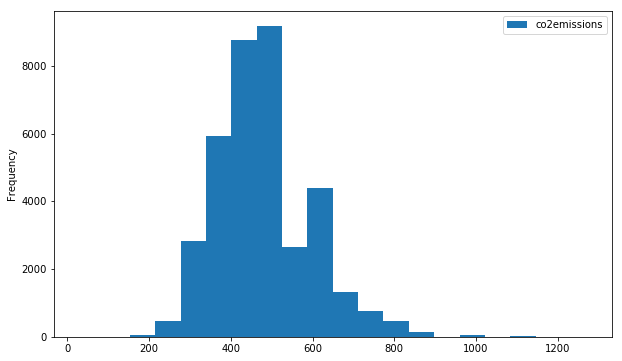

In [4]:
%matplotlib inline
vehicles[['co2emissions']].plot(kind = 'hist', 
                                bins = 20, 
                                figsize = (10, 6))

## How to perform min-max Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
co2emissions_mm = MinMaxScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_mm 

array([[0.42435082],
       [0.42435082],
       [0.36738062],
       ...,
       [0.38208199],
       [0.50944265],
       [0.41674344]])

Put the normalized data back into a DataFrame.

In [14]:
co2emissions_mm = pd.DataFrame(co2emissions_mm, columns=['co2emissions'])
co2emissions_mm

,co2emissions
0,0.424351
1,0.424351
2,0.367381
3,0.318536
4,0.424351
5,0.367381
6,0.424351
7,0.353657
8,0.317749
9,0.334805


In [15]:
co2emissions_mm.describe()

,co2emissions
count,36979.000000
mean,0.360762
std,0.094949
min,0.000000
25%,0.299056
50%,0.353657
75%,0.424351
max,1.000000


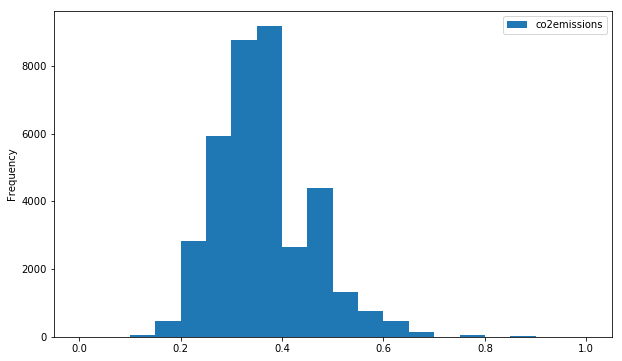

In [16]:
co2emissions_mm.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))

## How to perform z-score Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
co2emissions_zm = StandardScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_zm = pd.DataFrame(co2emissions_zm, columns = ['co2emissions'])
co2emissions_zm.describe()

,co2emissions
count,3.697900e+04
mean,-1.598668e-16
std,1.000014e+00
min,-3.799572e+00
25%,-6.498927e-01
50%,-7.482706e-02
75%,6.697254e-01
max,6.732510e+00


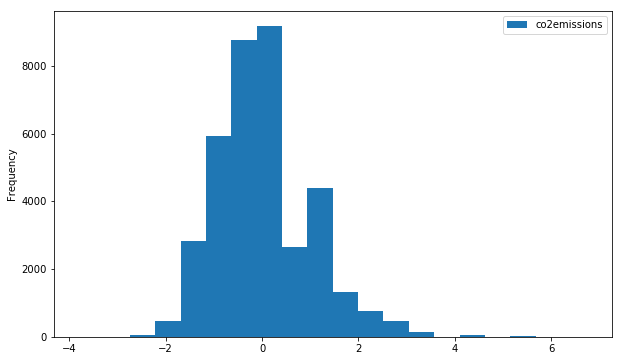

In [19]:
co2emissions_zm.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))